# **CVPS20 // Multi-Layer Perceptron Example: Part 2**

*October 22, 2020*

This notebook will continue with an example of using a Multi-Layer Perceptron to classify hand written digits.

---

In [ ]:
ls

drive/  sample_data/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, classification_report

In [ ]:
plt.style.use("seaborn-dark")
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

---

### Supervised Learning: Hand-written Digit Recognition with MLPs

Load the hand-written digits data,

In [ ]:
# -- load in the hand-written digits data set
fname = "/content/drive/My Drive/cvps20/data/examples/digits.png"
digits = np.asarray(iio.imread(fname)) / 255.

# -- get a list of individual numbers (note they are 20x20 pixels)
nums = digits.reshape(50, 20, 100, 20).transpose(0, 2, 1, 3).reshape(5000, 20, 20)

# -- create features array [NOTE THE .copy()]
nimg = nums.shape[0]
nrow = nums.shape[1]
ncol = nums.shape[2]
feat = nums.reshape(nimg, nrow * ncol).copy()

# -- set the target
targ = np.concatenate((np.full(500, 0), np.full(500, 1), np.full(500, 2),
                       np.full(500, 3), np.full(500, 4), np.full(500, 5),
                       np.full(500, 6), np.full(500, 7), np.full(500, 8),
                       np.full(500, 9)))

Let's train a **Multi-layer Perceptron classifier**,

In [ ]:
# -- create a training/testing sample
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, test_size=0.2, random_state=302)

print("number of training examples : {0}".format(targ_tr.size))
print("number of testing examples  : {0}".format(targ_te.size))

number of training examples : 4000
number of testing examples  : 1000


In [ ]:
# -- instantiate an MLP classifier

mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=500)
#mlp = MLPClassifier(hidden_layer_sizes=(10))

In [ ]:
# -- train it
mlp.fit(feat_tr, targ_tr)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

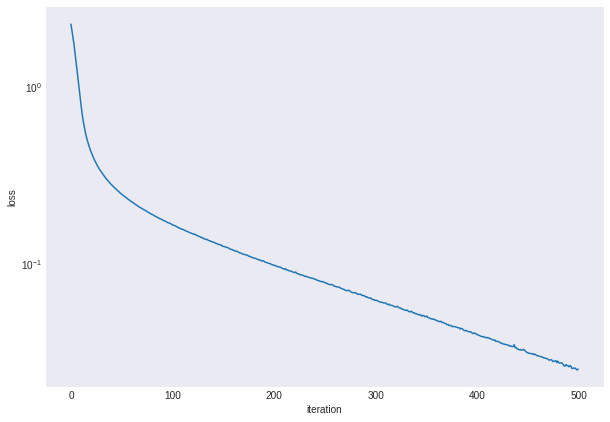

In [ ]:
# -- plot the loss function
fig, ax = plt.subplots()
ax.plot(mlp.loss_curve_)
ax.set_xlabel("iteration")
ax.set_ylabel("loss")
ax.set_yscale("log")
fig.show()

In [ ]:
# -- predict
pred_tr = mlp.predict(feat_tr)
pred_te = mlp.predict(feat_te)

In [ ]:
# -- print accuracy
acc_tr = accuracy_score(targ_tr, pred_tr)
acc_te = accuracy_score(targ_te, pred_te)

print("training accuracy : {0}".format(acc_tr))
print("testing accuracy : {0}".format(acc_te))

training accuracy : 0.99925
testing accuracy : 0.885


              precision    recall  f1-score   support

           0       0.93      0.94      0.93       109
           1       0.96      0.96      0.96        92
           2       0.92      0.88      0.90        98
           3       0.82      0.88      0.85        95
           4       0.86      0.92      0.89       110
           5       0.77      0.85      0.81        93
           6       0.88      0.93      0.91       106
           7       0.91      0.88      0.89        91
           8       0.92      0.77      0.84       102
           9       0.91      0.84      0.87       104

    accuracy                           0.89      1000
   macro avg       0.89      0.88      0.88      1000
weighted avg       0.89      0.89      0.89      1000



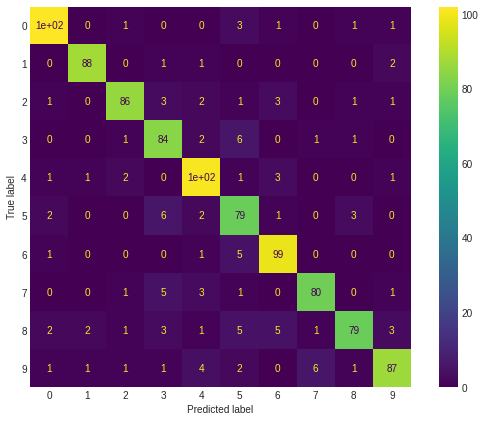

In [ ]:
# -- evaluate performance metrics
plot_confusion_matrix(mlp, feat_te, targ_te)
print(classification_report(targ_te, pred_te))

In [ ]:
mlp.coefs_

[array([[-2.37309170e-222,  4.06267613e-212,  2.07103320e-222, ...,
         -3.65486421e-210,  7.07120852e-223, -8.08138780e-221],
        [ 2.52573412e-226, -4.45929242e-227, -9.48171453e-217, ...,
          5.16626368e-224,  4.61004520e-226, -1.75700747e-212],
        [-1.11566986e-210,  2.99221240e-227,  4.42023841e-219, ...,
         -1.54004901e-219, -9.83434453e-231,  3.42665139e-224],
        ...,
        [ 1.68051322e-001, -1.67427158e-001,  3.77293211e-002, ...,
         -5.78793546e-002, -2.20231554e-002, -3.36112640e-002],
        [-1.91467834e-221, -8.56217576e-229, -1.97623724e-226, ...,
          2.89072643e-218,  1.93113433e-224,  5.22564456e-222],
        [-4.85623619e-223, -1.57317964e-211,  4.06765763e-225, ...,
         -1.73391710e-223, -5.22529801e-221,  3.02605946e-223]]),
 array([[-1.00323615,  0.11052228,  1.54509115, -0.91590191, -1.53901325,
          1.46316608,  0.05215721, -0.22280978,  0.60032412, -2.11785897],
        [ 0.43534835,  0.43079109, -0.889486

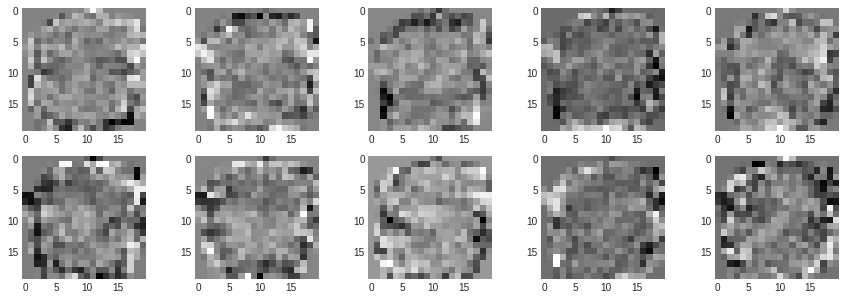

In [ ]:
# -- visualize the weights
ww = mlp.coefs_[0].reshape(20,20,10)

fig, ax = plt.subplots(2, 5, figsize=[15, 5])
for ii in range(10):
  ax[ii // 5, ii % 5].imshow(ww[:, :, ii])